In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [3]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [4]:
s = 22.0
data = data[data[3]==s]
data.head()

,0,1,2,3,4,5,6,7
746360,2004-03-16,14:56:43.822296,2,22.0,22.0170,34.3273,772.80,2.45421
746361,2004-02-28,00:59:16.853347,3,22.0,19.6356,37.0246,82.80,2.65143
746362,2004-03-16,14:57:45.267276,4,22.0,21.8112,34.5360,743.36,2.44412
746363,2004-03-16,14:59:14.346466,7,22.0,21.6740,34.9528,772.80,2.44412
746364,2004-03-16,15:00:18.176784,9,22.0,21.6152,35.0568,743.36,2.44412


In [5]:
# print(S1df.shape)
outliersILista = []
outliersIListaV = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersILista.append(i)
        outliersIListaV.append(row[4])
print(data.shape, len(outliersILista))
# Removendo outliers no sensor
passo3= data.copy()
print(passo3.head())
print(passo3.shape)

(60165, 8) 18562
                 0                1  2     3        4        5       6  \
746360  2004-03-16  14:56:43.822296  2  22.0  22.0170  34.3273  772.80   
746361  2004-02-28  00:59:16.853347  3  22.0  19.6356  37.0246   82.80   
746362  2004-03-16  14:57:45.267276  4  22.0  21.8112  34.5360  743.36   
746363  2004-03-16  14:59:14.346466  7  22.0  21.6740  34.9528  772.80   
746364  2004-03-16  15:00:18.176784  9  22.0  21.6152  35.0568  743.36   

              7  
746360  2.45421  
746361  2.65143  
746362  2.44412  
746363  2.44412  
746364  2.44412  
(60165, 8)


In [6]:
passo3= passo3.drop(outliersILista)
print(passo3.shape)
passo3.to_csv('sensor.csv')
data = pd.read_csv("sensor.csv")
data.shape

(41603, 8)


(41603, 9)

In [7]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
# data.head(1)
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

22.0 
             0                1  2     3        4        5       6        7
0  2004-03-16  14:56:43.822296  2  22.0  22.0170  34.3273  772.80  2.45421
1  2004-02-28  00:59:16.853347  3  22.0  19.6356  37.0246   82.80  2.65143
2  2004-03-16  14:57:45.267276  4  22.0  21.8112  34.5360  743.36  2.44412
3  2004-03-16  14:59:14.346466  7  22.0  21.6740  34.9528  772.80  2.44412
4  2004-03-16  15:00:18.176784  9  22.0  21.6152  35.0568  743.36  2.44412
--------------------------------


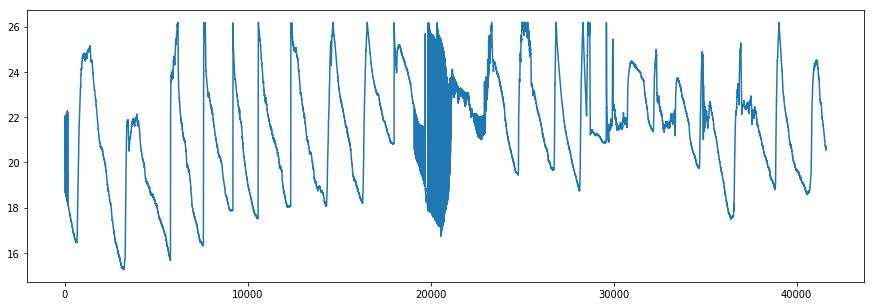

In [8]:
plt.figure(figsize = (15,5))
data[:data.shape[0]]['4'].plot()

In [9]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()


In [10]:
d = d.sort_values(['0','1'],ascending = [1,1])
d.shape, (d.tail())

((41603, 8),
                 0                1      2     3        4        5     6  \
 23323  2004-03-23  03:52:05.456333  32992  22.0  26.1134  52.8734  0.46   
 23324  2004-03-23  03:52:33.969984  32993  22.0  25.9860  52.8418  0.46   
 23325  2004-03-23  03:53:42.441453  32995  22.0  26.0840  52.9051  0.46   
 23326  2004-03-23  03:54:11.769108  32996  22.0  26.1918  52.8418  0.46   
 23327  2004-03-23  03:56:03.164408  33000  22.0  26.0840  52.8101  0.46   
 
              7  
 23323  2.24121  
 23324  2.24121  
 23325  2.24121  
 23326  2.24121  
 23327  2.24121  )

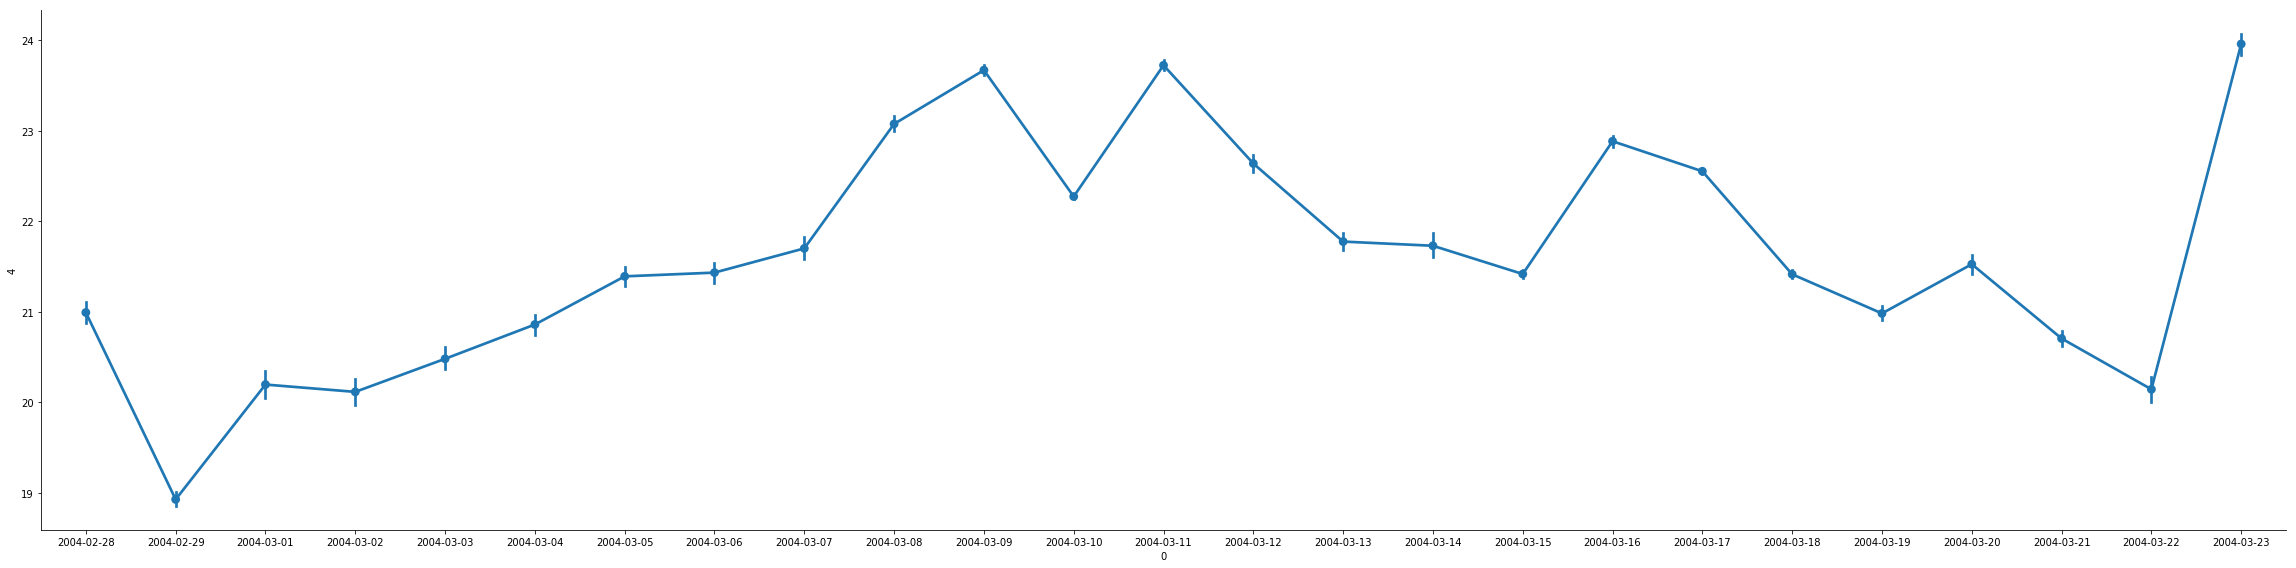

In [11]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

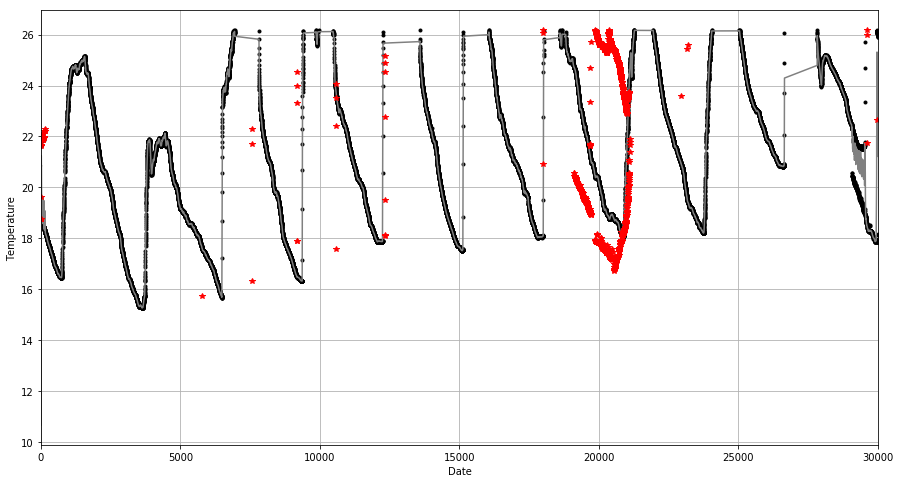

In [12]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):

    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")



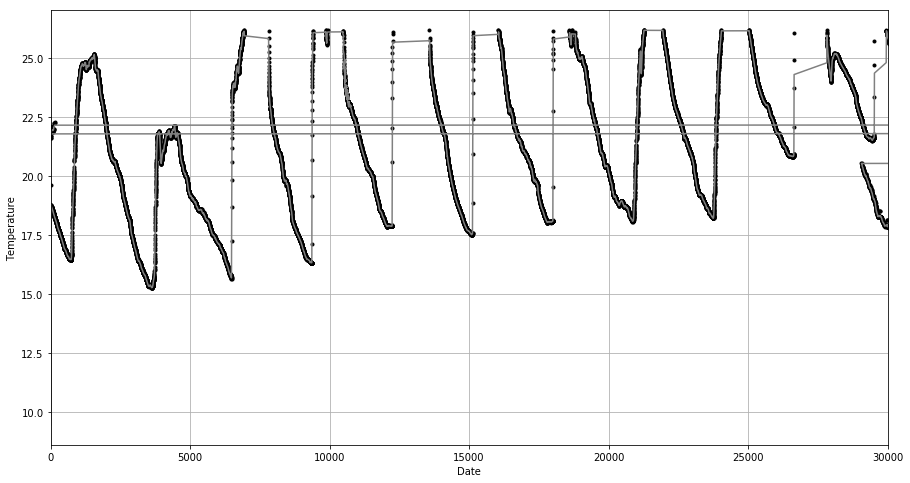

In [13]:
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

In [14]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    print(len(x_anomaly))
    return x_anomaly

x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

259


array([    0,     1,     2,     3,     4,  5737,  5738,  5739,  5740,
        5741,  5742,  5743,  5744,  5745,  5746,  5747,  5754,  6157,
        7538,  7539,  7540,  7541,  7543,  7544,  7545,  7546,  7547,
        7548,  7549,  7550,  7643,  7646,  7647,  7648,  7649,  7651,
        7652,  7653,  7654,  7660,  7661,  7662,  7663,  7664,  7665,
        7666,  7667,  7668,  7669,  7670,  7671,  7680,  7684,  7687,
        7690,  7695,  7697,  7698,  7699,  7700,  7702,  7707,  7710,
        7711,  7712,  7713,  7720,  7727,  7730,  7735,  7741,  7744,
        7752,  9150,  9151,  9152,  9153,  9155,  9156,  9157,  9158,
        9159,  9160,  9161,  9162,  9163,  9164,  9165, 10530, 10531,
       10532, 10533, 10534, 10535, 10536, 10537, 10538, 10539, 10540,
       10541, 10542, 12312, 12313, 12314, 12315, 12316, 12317, 12318,
       12319, 12320, 12324, 12325, 17964, 17965, 17966, 17967, 17968,
       17969, 17970, 17971, 17972, 17973, 19491, 19492, 19493, 19495,
       19496, 19497,

In [15]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(41603, 8)
(41344, 8)


259


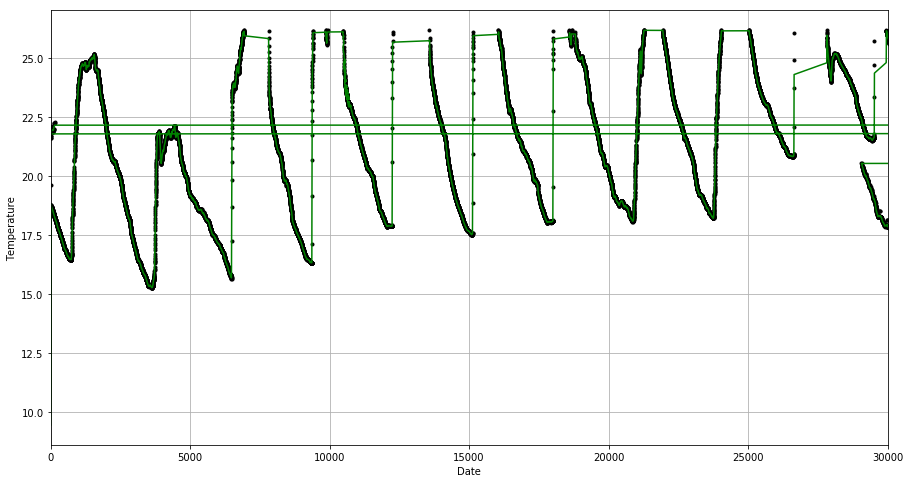

In [16]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
   
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")

# Depois de ter os dados reconstruídos - verificamos a série temporal

4390


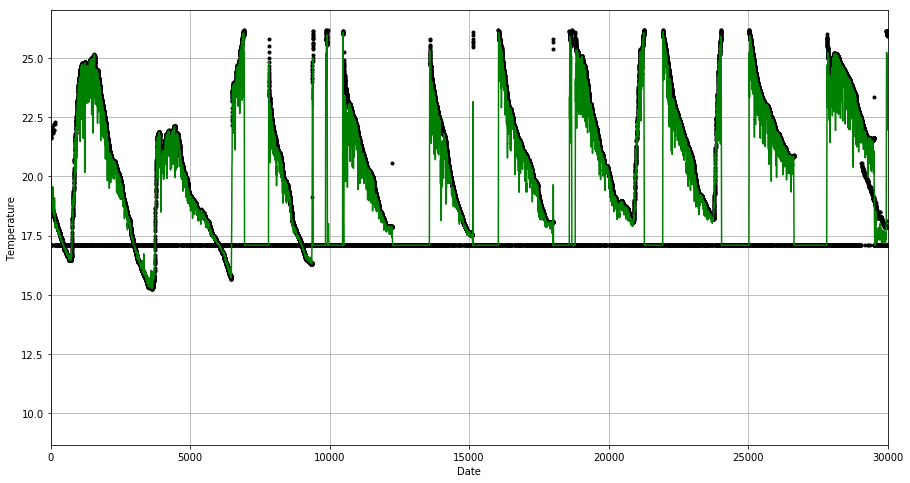

In [31]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


# Estatísticas Simples

In [17]:
dplot[dplot['Moteid']==s].shape
# Passo 0
sensor = s
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==sensor].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==sensor][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,60165,31.319529,26.418827,23.0068,14.515759


In [18]:
# Passo 1
myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),41603,21.468746,2.428,21.6348,1.97435


In [19]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

41344


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,41344,21.459558,2.424977,21.6348,1.972353


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [29]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.794418,2.847928,19.0672,2.548048


In [30]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )

  Data type   size       mean         SD   median        MAD
0  Raw Data  60165  31.319529  26.418827  23.0068  14.515759
      Data type   size       mean     SD   median      MAD
0  step 1 (BOR)  41603  21.468746  2.428  21.6348  1.97435
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  41344  21.459558  2.424977  21.6348  1.972353
  Data type   size       mean        SD   median       MAD
0    step 3  65536  19.794418  2.847928  19.0672  2.548048


##  Etapa para reconstruir as Épocas que estão faltando

In [21]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)
passoOEp = passoO['2'].tolist()
len(passoOEp)

idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

24979
65536 40557


In [23]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((41603, 8), int,              1
 2004-02-28  34)

In [22]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


24979


,0,1,2,3,4,5,6,7
24969,2004-03-24,09:15:01.967037,65467,1.0,0,46.4265,235.52,2.24970
24970,2004-03-11,17:17:27.618926,65490,1.0,0,39.4842,121.44,2.51661
24971,2004-03-24,09:15:32.481665,65496,1.0,0,46.3281,235.52,2.24970
24972,2004-03-11,17:17:58.362661,65502,1.0,0,39.4502,121.44,2.51661
24973,2004-03-11,17:18:34.938862,65516,1.0,0,39.5181,121.44,2.51661
24974,2004-03-11,17:19:34.861153,65522,1.0,0,39.4162,121.44,2.51661
24975,2004-03-11,17:20:03.235848,65524,1.0,0,39.4502,121.44,2.51661
24976,2004-03-24,09:18:38.182619,65528,1.0,0,46.4265,412.16,2.24970
24977,2004-03-11,17:20:57.848782,65533,1.0,0,39.4162,114.08,2.51661
24978,2004-03-11,17:21:27.709143,65534,1.0,0,39.4162,114.08,2.51661


# Gerando o csv para fazer reconstrução dos dados

In [24]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(10)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(66323, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [28]:
final= pd.read_csv('finalsensor.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (66323, 8))